This project focuses on the FIFA 2019 Dataset collected from Kaggle.com. The purpose here is use Data Science and improve myself in EDA/MLA for data visualization and creating learning models on Jupyter. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [78]:
datafile = pd.read_csv('fifa19.csv')

In [3]:
#data.drop('Unnamed: 0',axis=1,inplace=True)
#With some assistance from my brother who has experience with the FIFA games, some of these columns are stats for players
#that indicate how well they can play the game overall in terms of mechanics and skills. The acronyms are all possible 
#positions in soccer and the scores are a respective range for how well each player could play each position. From personal
#experience, my brother states that most managers don't deviate their players from their original roles so for the purposes 
#of this project, we can drop those columns that won't be useful in our ML models.
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
part1 = data[['Position','Age',
       'Height','Weight','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','Overall','Value']]
part1 = part1.dropna(axis=0)

In [5]:
def w_convert(weight):
    num = weight[0:3]
    out = float(num)
    return out 
def inches(height):
    h = height.split("'")
    feet = float(h[0])*12
    inches = float(h[1])
    return feet + inches 
def dollars(value):
    val = value[1:len(value)-1]
    if value[-1] == 'M':
        res = float(val)*(10**6)
        return res 
    elif value[-1] == 'K':
        res = float(val)*(10**3)
        return res 

In [6]:
part1['Weight'] = part1['Weight'].apply(w_convert)
part1['Height'] = part1['Height'].apply(inches)
part1['Value'] = part1['Value'].apply(dollars)
part1['Value'] = part1['Value'].apply(np.log10)
df1 = part1
df1.dropna(axis=0,inplace=True)
#Here we will modify the string columns so that their data is in float form 

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
#Import the respective libraries from sklearn

In [8]:
scaler = StandardScaler()
scaler.fit(df1.drop(['Position'],axis=1))
scaled_data = scaler.transform(df1.drop(['Position'],axis=1))

C:\Users\egran\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\egran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
le = LabelEncoder()
le.fit(df1['Position'])
pos_codes = le.transform(df1['Position'])
#Here we labelencode the data so that we can assign each soccer position to a class for the algorithm 

In [10]:
x_pca = pca.transform(scaled_data)

In [11]:
x_pca.shape

(17907, 2)

Text(0, 0.5, 'Second Principal Component')

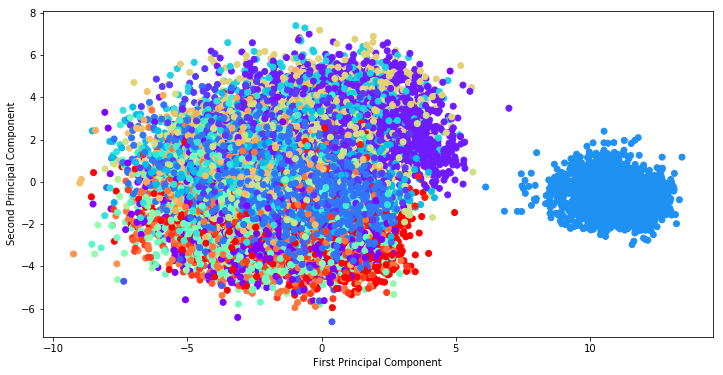

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=pos_codes,cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

From the PCA analysis involving 2 principal components, there is a clear distinct position on the right. This class is the Goalkeeper who have the highest stats in all GK positions. Based on the position codes, there are 27 possible positions that include alternative names for the original 11 positions! This already explains the vast amount of uncertainty that arises from the left of the PCA plot!

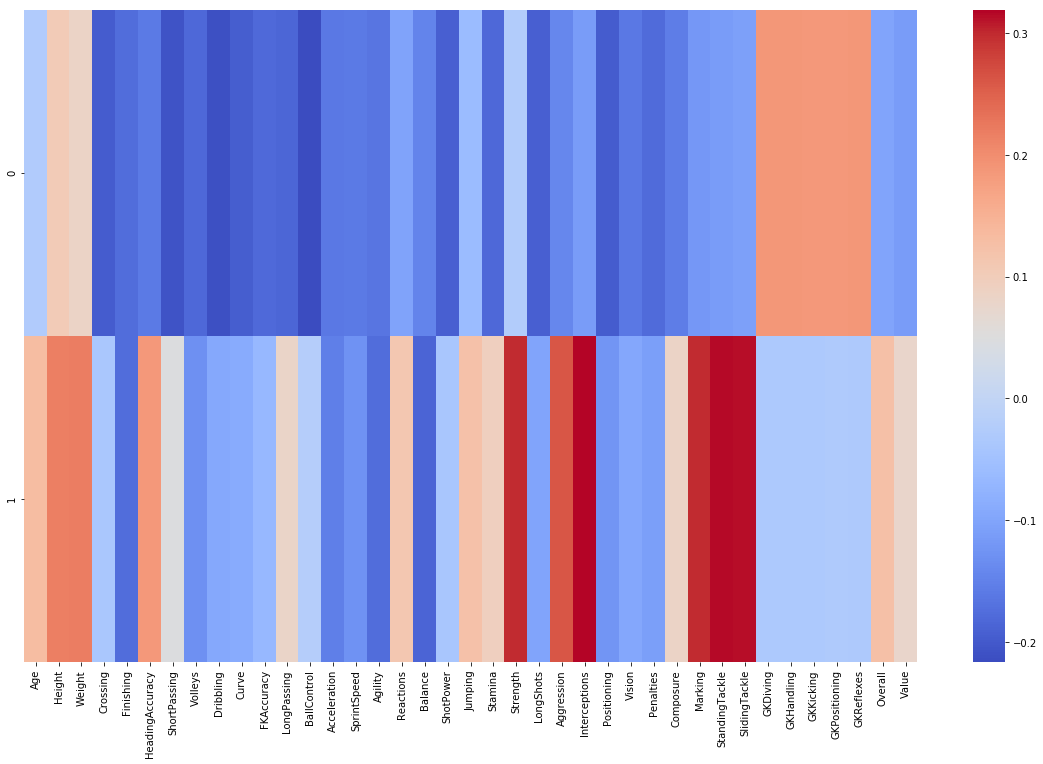

In [13]:
df_comp = pd.DataFrame(pca.components_,columns=part1.drop(['Position'],axis=1).columns)
plt.figure(figsize=(20,12))
sns.heatmap(df_comp,cmap='coolwarm')

To perhaps simplify the algorithm, it might be advised to change some of the positional names to match those of the 
original 11. I would also like to incorporate a classification that indicates whether the player is a forward, center
or defender with as few parameters as possible! So given a few vital stats, we can indicate which of the main 3 positions
a player might actually be!!
Just playing around with the minimums, we are already seeing that those all belong to Goalkeepers! 

In [14]:
gk = part1[part1['Position'] == 'GK'][['Height','Weight','Age','GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','Overall','Value']]
#Let's have some fun with the goalkeepers!

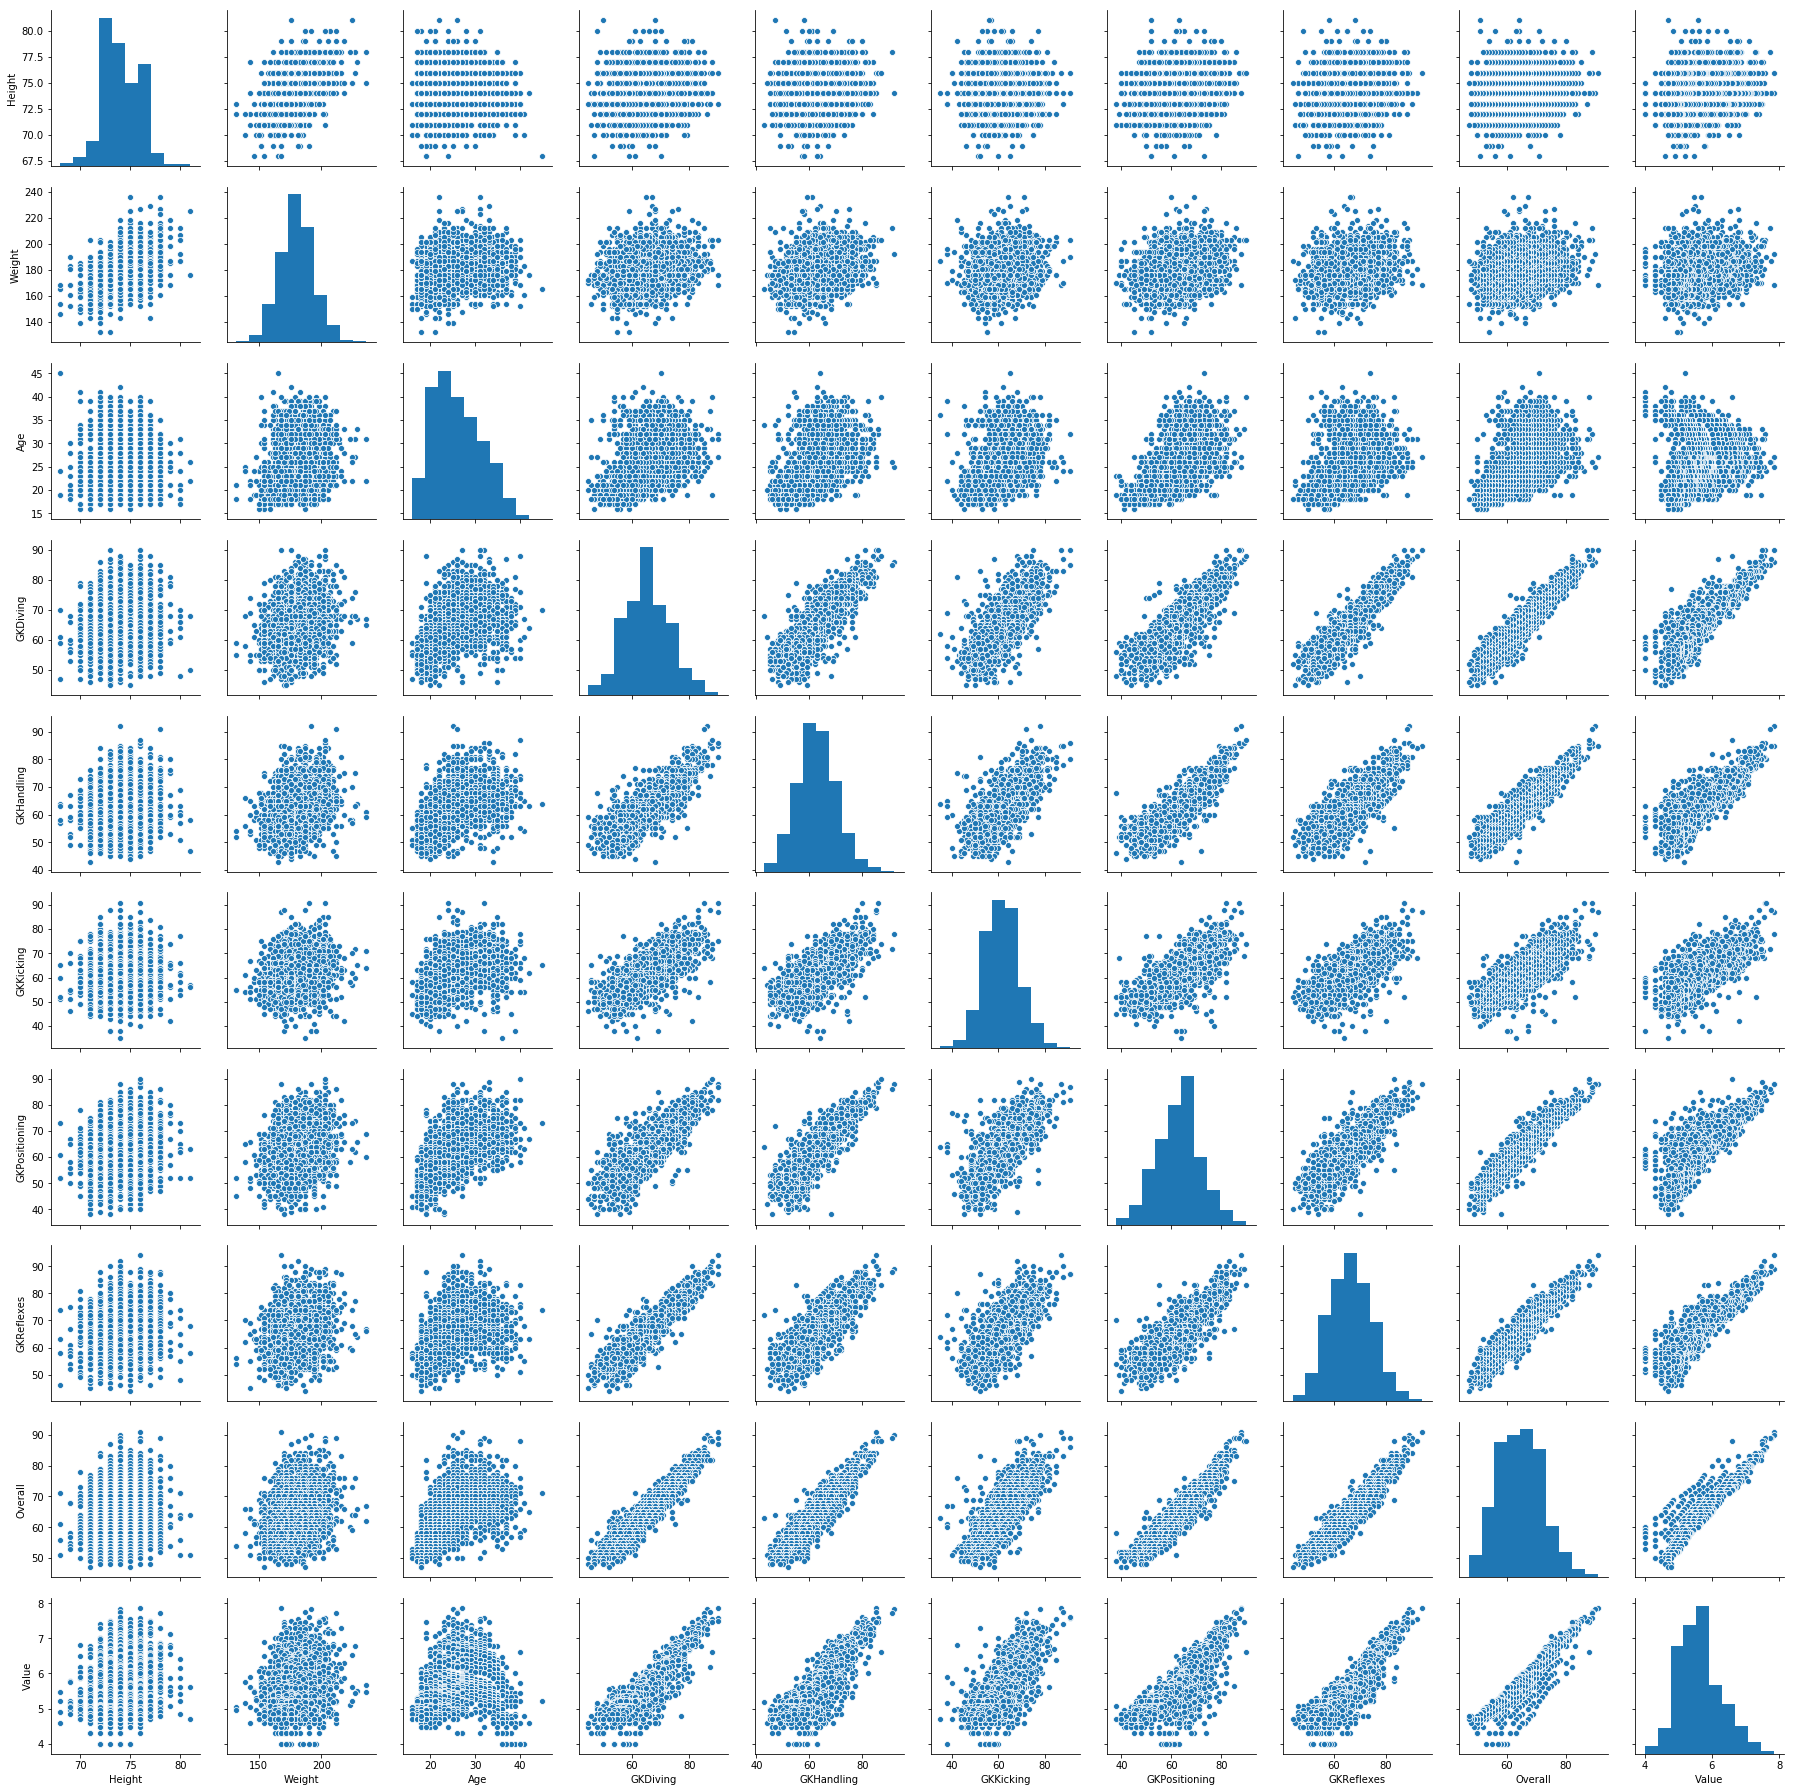

In [15]:
sns.pairplot(gk)
#From just the pairplots, the most important factor towards a successful goalie is their reflexes which again makes the role
#the most stressful when it comes to being the last line of defense for your team!

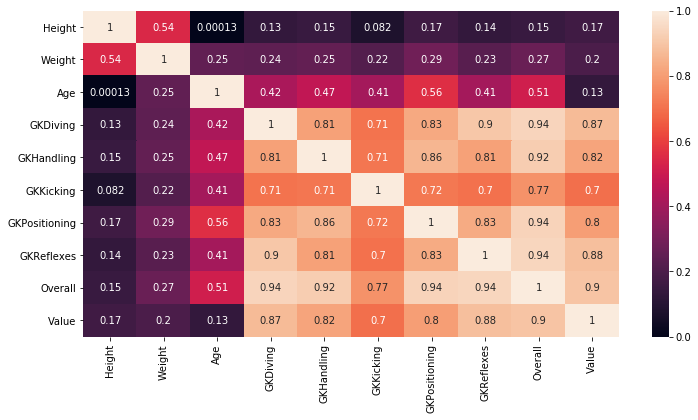

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(gk.corr(),annot=True)
#Important to note is that even though weight appears to have a weak correlation to the attributes of the player, we must
#keep note that is also the moderate correlation between the height/weight of player that is accounting for the appearance 
#of this info.

In [17]:
X = gk[['Height','Age','Overall','Weight']].apply(np.log10)
y= gk['Value']
gk.shape
#Here we can run a linear regression model through a log-log transformation

(1989, 10)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print (lm.coef_)

[ 0.10269185 -3.33283461 14.52202604  0.04880382]


Text(0, 0.5, 'Predicted Y')

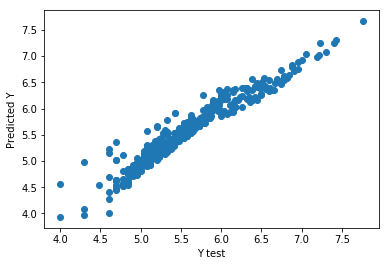

In [20]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [21]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
r2 = metrics.r2_score(y_test,predictions)
RMSE = np.sqrt(MSE)
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('rsq: {}'.format(r2))
print('RMSE: {}'.format(RMSE))

MAE: 0.12433857975278433
MSE: 0.027571003966401438
rsq: 0.9271435656882691
RMSE: 0.16604518651981887


C:\Users\egran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


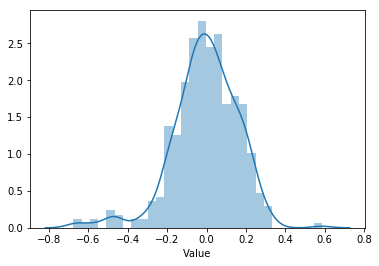

In [22]:
residuals = y_test-predictions 
sns.distplot(residuals,bins=30)

Now that we have ran some regression on the goalie position, we can focus on the other position namely the forwards, centers,
and defenders. The goal here is to use the attributes to determine which class a player would most probably belong to, figure 
out the more important parameters for each position!

In [23]:
df1.shape

(17907, 40)

In [24]:
#We will create a function to alter the positions so that we are only involved with the original 11.
df1['Position'].value_counts()

ST     2130
GK     1989
CB     1751
CM     1377
LB     1304
RB     1268
RM     1114
LM     1086
CAM     946
CDM     936
RCB     652
LCB     635
LCM     389
RCM     387
LW      374
RW      365
RDM     246
LDM     239
LS      206
RS      201
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [25]:
def original_11(pos):
    if pos in ['CF','LS','RS']:
        return 'ST'
    elif pos in ['LCB','RCB']:
        return 'CB'
    elif pos in ['LCM','RCM']:
        return 'CM'
    elif pos == 'LWB':
        return 'LB'
    elif pos == 'RWB':
        return 'RB'
    elif pos in ['LM','LF']:
        return 'LW'
    elif pos in ['RM','RF']:
        return 'RW'
    elif pos in ['LAM','RAM']:
        return 'CAM'
    elif pos in ['LDM','RDM']:
        return 'CDM'
    else:
        return pos

In [26]:
df1['Position'] = df1['Position'].apply(original_11)

In [27]:
df1['Position'].value_counts()
#Since the goalkeeper has separate stats, we can drop this position and those columns and look at the rest of the players!
part2 = df1[df1['Position'] != 'GK']
part2.drop(['GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'],axis=1,inplace=True)

C:\Users\egran\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
from sklearn.svm import SVC
X = part2.drop('Position',axis=1)
y = part2['Position']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [29]:
svc_model = SVC(kernel='linear',C=1,decision_function_shape='ovo')
svc_model.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
predictions = svc_model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print(confusion_matrix(y_test,predictions))

[[135   0   2  76   1  31   0  27  16]
 [  0 803  49   9  17   0  30   0   0]
 [  1  25 237 143   6   1   6   1   0]
 [ 15   1  43 556   4   7  10   7   5]
 [  0  19   9  14 210   3 159   1   0]
 [ 40   0   0  31  21 130  12 162  54]
 [  0  15  19   9 142   3 226   0   0]
 [ 48   0   3  27   7 125  14 160  59]
 [ 18   0   0   2   1  23   0  30 716]]


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         CAM       0.53      0.47      0.50       288
          CB       0.93      0.88      0.91       908
         CDM       0.65      0.56      0.61       420
          CM       0.64      0.86      0.73       648
          LB       0.51      0.51      0.51       415
          LW       0.40      0.29      0.34       450
          RB       0.49      0.55      0.52       414
          RW       0.41      0.36      0.39       443
          ST       0.84      0.91      0.87       790

   micro avg       0.66      0.66      0.66      4776
   macro avg       0.60      0.60      0.60      4776
weighted avg       0.66      0.66      0.66      4776



In [34]:
error_rate = np.mean(y_test != predictions)
print(error_rate)
#The fact that the error rate for classification is 33% is not the best of news. What we can do from here is two options,
#either reduce the numbers of classes to a more general role in soccer (offense,defense or mid) or running a gridsearch in 
#hope of obtaining much better results. 

0.33563651591289784


In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

C:\Users\egran\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.19101425881086898, total=  31.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.9s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.1911170928667564, total=  31.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.19137466307277629, total=  31.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.19101425881086898, total=  26.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.1911170928667564, total=  28.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.19137466307277629, total=  27.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.19101425881086898, total=  18.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.1911170928667564, total=  19.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.19137466307277629, total=  19.0s
[CV] C=0.1, gamma=0.001, kernel=rbf 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 27.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [36]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [37]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[ 93   0   4  82   0  38   1  40  30]
 [  0 811  34  19  18   0  26   0   0]
 [  4  45 218 142   4   1   5   1   0]
 [ 22  10  75 491   8  14   8  11   9]
 [  0  48  11  18 195   3 138   2   0]
 [ 31   2   1  33  18 122  17 161  65]
 [  0  53  13  14 143   5 183   3   0]
 [ 38   1   2  41   7 105  13 177  59]
 [ 10   3   0   4   0  26   0  43 704]]


In [39]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         CAM       0.47      0.32      0.38       288
          CB       0.83      0.89      0.86       908
         CDM       0.61      0.52      0.56       420
          CM       0.58      0.76      0.66       648
          LB       0.50      0.47      0.48       415
          LW       0.39      0.27      0.32       450
          RB       0.47      0.44      0.45       414
          RW       0.40      0.40      0.40       443
          ST       0.81      0.89      0.85       790

   micro avg       0.63      0.63      0.63      4776
   macro avg       0.56      0.55      0.55      4776
weighted avg       0.61      0.63      0.61      4776



Unfortunately, it would be best to run a VIF analysis to solve the issue of multicollinearity and appropriately select 
the key features. Another option would be to further generalize the positions so that we only have 3 classes to worry about
however the problem is that some positions are required to be hybrid players; for example a central attacking mid would be
shifting between offense and mid. Another issue that can be seen is that some positions will be almost the same the 
difference is left and right which is minimal. So here we will sacrifice accuracy to simplify the noise in the dataset! 

In [40]:
def general_3(pos):
    if pos in ['LW','RW','ST','CAM']:
        return 'Forward'
    elif pos in ['CDM','CM']:
        return 'Mid'
    else:
        return 'Defender'

In [41]:
part3 = part2
part3['Role'] = part2['Position'].apply(general_3)

C:\Users\egran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
part3.shape

(15918, 36)

In [43]:
X = part3.drop(['Position','Role'],axis=1)
y = part3['Role']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [44]:
svc_model = SVC(kernel='linear',C=1,decision_function_shape='ovo')
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1602    5  116]
 [  60 1837  113]
 [  75   64  904]]


              precision    recall  f1-score   support

    Defender       0.92      0.93      0.93      1723
     Forward       0.96      0.91      0.94      2010
         Mid       0.80      0.87      0.83      1043

   micro avg       0.91      0.91      0.91      4776
   macro avg       0.89      0.90      0.90      4776
weighted avg       0.91      0.91      0.91      4776



C:\Users\egran\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\egran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Second Principal Component')

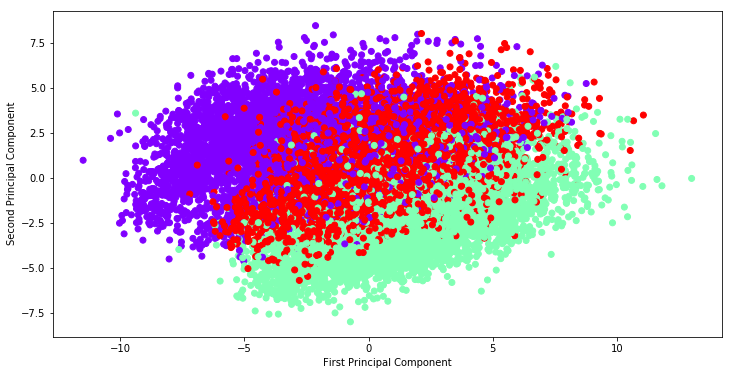

In [45]:
scaler = StandardScaler()
scaler.fit(part3.drop(['Position','Role'],axis=1))
scaled_data = scaler.transform(part3.drop(['Position','Role'],axis=1))
pca = PCA(n_components=2)
pca.fit(scaled_data)
le = LabelEncoder()
le.fit(part3['Role'])
pos_codes = le.transform(part3['Role'])
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(12,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=pos_codes,cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [46]:
pca.components_

array([[ 0.08518424, -0.09844931, -0.06109284,  0.21349537,  0.22069816,
         0.00379219,  0.21657071,  0.22664275,  0.25086949,  0.23919307,
         0.21475318,  0.17584728,  0.25534354,  0.13936303,  0.12648477,
         0.18630866,  0.18648498,  0.13696881,  0.22041907,  0.01053349,
         0.1094332 , -0.03404223,  0.24201994,  0.02331393, -0.02709895,
         0.23688072,  0.24261332,  0.19756638,  0.19767594, -0.03823156,
        -0.04989989, -0.05785274,  0.19789275,  0.19865657],
       [ 0.17231968,  0.17551486,  0.1915103 ,  0.02576565, -0.1193896 ,
         0.23384977,  0.14108008, -0.0618727 , -0.0598862 , -0.01155349,
         0.01369289,  0.16272894,  0.044122  , -0.16175959, -0.13803245,
        -0.13950643,  0.19616482, -0.16145035,  0.03125139,  0.11140637,
         0.14276433,  0.25273841, -0.02530898,  0.28995501,  0.30728945,
        -0.07790206,  0.00504935, -0.06148561,  0.17178632,  0.29269513,
         0.30019057,  0.2882671 ,  0.21297397,  0.16586935]])

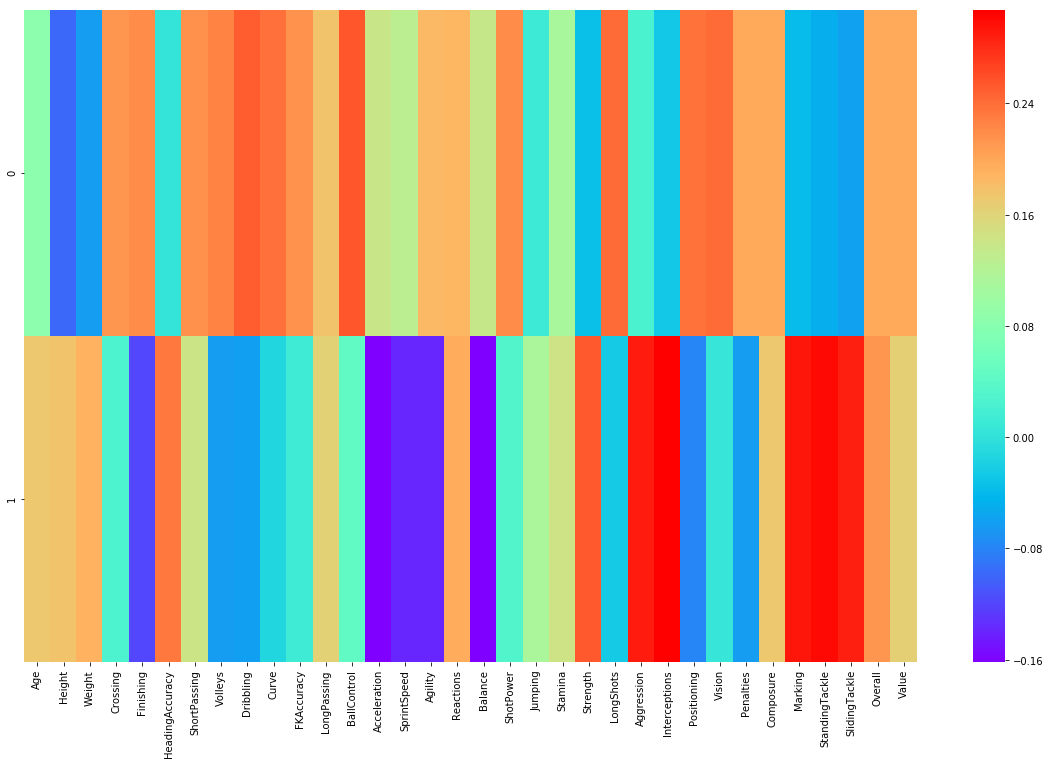

In [47]:
df_comp = pd.DataFrame(pca.components_,columns=part3.drop(['Position','Role'],axis=1).columns)
plt.figure(figsize=(20,12))
sns.heatmap(df_comp,cmap='rainbow')

With the adjustment to 3 general positions, the SVC classifier did a much better job in separating the players in the dataset.
We can use the heatmap and pick out the more important attributes for feature engineering in hopes of better separation of 
classes

In [48]:
feat_eng = part3.drop(['Position','Role','Overall'],axis=1)
X = feat_eng
y = part3['Role']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [49]:
svc_model = SVC(kernel='linear',C=1,decision_function_shape='ovo')
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1630    6  124]
 [  49 1774  132]
 [  89   58  914]]


              precision    recall  f1-score   support

    Defender       0.92      0.93      0.92      1760
     Forward       0.97      0.91      0.94      1955
         Mid       0.78      0.86      0.82      1061

   micro avg       0.90      0.90      0.90      4776
   macro avg       0.89      0.90      0.89      4776
weighted avg       0.91      0.90      0.91      4776



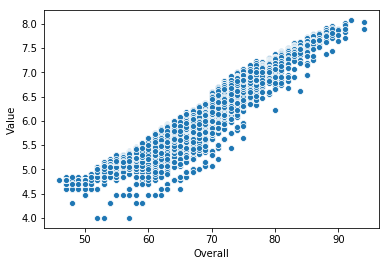

In [50]:
sns.scatterplot('Overall','Value',data=part3)

In [51]:
#One factor that I did not take into account is the how the distribution of the roles was handled. The formation I chose 
#focused on a 4-2-4 formation however from looking at a coaching manual, there are many formations to take into 
#consideration.This accounted for the extra positions available for each player. Just to ensure that this is the situation, 
#I will modify the classes to be based on the formation of preference! 
def modified_role(pos):
    if pos in ['LB','RB']:
        return 'SB'
    elif pos in ['LW','RW']:
        return 'SW'
    else:
        return pos

In [52]:
part4 = part2
part4.shape

(15918, 36)

In [53]:
part4['Role'] = part4['Position'].apply(modified_role)

C:\Users\egran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
X = part4.drop(['Position','Role'],axis=1)
y = part4['Role']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
svc_model = SVC(kernel='linear',C=1,decision_function_shape='ovo')
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
#Again due to the complexity of the formations, we improved our model slightly but there is still a 20% error rate.

[[ 93   0   1  61   0  19 110]
 [  0 796  38   5  59   0   0]
 [  2  25 240 124  26   1   5]
 [  7   4  52 545  25   2  21]
 [  0  18  15  23 745   1   2]
 [  8   2   0   6   3 732  81]
 [ 32   0   2  57  54  93 641]]


              precision    recall  f1-score   support

         CAM       0.65      0.33      0.44       284
          CB       0.94      0.89      0.91       898
         CDM       0.69      0.57      0.62       423
          CM       0.66      0.83      0.74       656
          SB       0.82      0.93      0.87       804
          ST       0.86      0.88      0.87       832
          SW       0.75      0.73      0.74       879

   micro avg       0.79      0.79      0.79      4776
   macro avg       0.77      0.74      0.74      4776
weighted avg       0.79      0.79      0.79      4776



In [55]:
#This time around I will use the RFC model to see if the issue the entire time was selecting the wrong model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
X = part4.drop(['Position','Role'],axis=1)
y = part4['Role']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

         CAM       0.50      0.20      0.29       294
          CB       0.88      0.89      0.89       912
         CDM       0.63      0.46      0.53       431
          CM       0.62      0.70      0.65       632
          SB       0.78      0.91      0.84       826
          ST       0.85      0.87      0.86       784
          SW       0.69      0.72      0.71       897

   micro avg       0.75      0.75      0.75      4776
   macro avg       0.71      0.68      0.68      4776
weighted avg       0.74      0.75      0.74      4776



[[ 60   1   1  68   1  22 141]
 [  0 816  21   8  66   1   0]
 [  2  58 199 132  35   0   5]
 [ 18   7  82 440  42   4  39]
 [  1  43  11   9 750   0  12]
 [  5   2   0   2   2 685  88]
 [ 35   1   1  56  65  91 648]]


In [56]:
rfc = RandomForestClassifier(n_estimators=600)
X = part3.drop(['Position','Role'],axis=1)
y = part3['Role']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

         CAM       0.58      0.23      0.33       295
          CB       0.89      0.90      0.89       932
         CDM       0.58      0.48      0.52       416
          CM       0.58      0.68      0.62       627
          SB       0.80      0.89      0.84       823
          ST       0.86      0.87      0.86       785
          SW       0.70      0.72      0.71       898

   micro avg       0.75      0.75      0.75      4776
   macro avg       0.71      0.68      0.68      4776
weighted avg       0.75      0.75      0.74      4776



[[ 68   0   2  74   1  17 133]
 [  0 835  36   7  54   0   0]
 [  1  45 199 138  29   0   4]
 [ 18   5  90 426  46   4  38]
 [  0  49  16  20 729   1   8]
 [  3   1   0   4   1 685  91]
 [ 28   0   3  71  56  93 647]]


In [57]:
from sklearn.model_selection import cross_val_score
svcscore = SVC(kernel='linear',C=1)
rfcscore = RandomForestClassifier(n_estimators=600)
X = part4.drop(['Position','Role'],axis=1)
y = part4['Role']
print(cross_val_score(svcscore,X,y,cv=5,verbose=2))
print(cross_val_score(rfcscore,X,y,cv=5,verbose=2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total= 7.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.8min remaining:    0.0s


[CV] ................................................. , total= 8.7min
[CV]  ................................................................
[CV] ................................................. , total= 7.6min
[CV]  ................................................................
[CV] ................................................. , total= 8.4min
[CV]  ................................................................
[CV] ................................................. , total= 7.9min
[0.77596486 0.78963893 0.78486181 0.78434455 0.77302735]
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 40.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=  39.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s remaining:    0.0s


[CV] ................................................. , total=  40.3s
[CV]  ................................................................
[CV] ................................................. , total=  40.5s
[CV]  ................................................................
[CV] ................................................. , total=  41.2s
[CV]  ................................................................
[CV] ................................................. , total=  41.0s
[0.65453404 0.74348509 0.73209799 0.72021377 0.69443571]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.4min finished


Creating a classfication system to determine soccer player positions can prove to be very difficult due to similiarities from neighboring classes as well as the number of formations a soccer team is expected to play so the functions created were for the 
assumption of a 4-2-4 formation that is typically played. This is apparently in how the original 11 function was defined when I assigned the other roles to fit one of the positions. The best overall classifier would have to be the SVC model even though it takes much longer than the RFC model to distinguish between the two models!

In [58]:
def hist(nat):
    his = {}
    for ele in nat:
        his[ele] = his.get(ele,0) + 1
    return his

In [59]:
def UK(nat):
    if nat == 'England':
        return 'United Kingdom'
    else:
        return nat

In [60]:
data['Nationality'] = data['Nationality'].apply(UK)

In [61]:
nat_list = list(data['Nationality'])
nat_hist = hist(nat_list)
keys = nat_hist.keys()
country = []
count_co = []
for key in keys:
    country.append(key)
    count_co.append(nat_hist[key])

In [62]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [63]:
data = dict(type='choropleth',
            colorscale = 'Rainbow',
            locations=country,
            locationmode = 'country names',
           z = count_co,
           text=country,
           colorbar = {'title':'Player Counts'})

layout = dict(
    title = 'Players by Nationality',
    geo = dict(showframe = False, projection = {'type':'mercator'}))

In [64]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [65]:
def topnum_stat(stat,no_players):
    topnum_stat = part3.sort_values(by=stat,ascending=False).head(no_players)
    return sns.countplot(x='Role',data=topnum_stat)

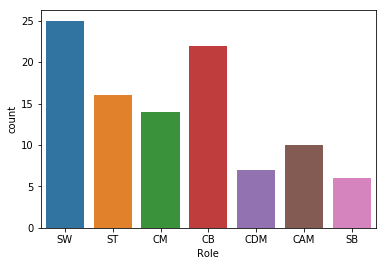

In [66]:
overall = topnum_stat('Overall',100)

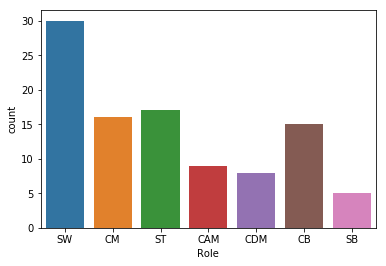

In [67]:
value = topnum_stat('Value',100)

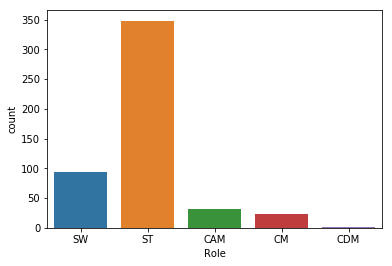

In [68]:
Marking = topnum_stat('Finishing',500)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X = part4.drop(['Position','Role'],axis=1)
y = part4['Role']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [70]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
predictions = dtree.predict(X_test)

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 79   0   8  61   5  22 102]
 [  1 726  60  27  86   4   4]
 [ 13  65 161 134  42   1  12]
 [ 68  30 108 328  41  10  70]
 [  4  93  55  57 537   1  57]
 [ 43   2   0  15   2 605 126]
 [131   4  16  69  58 135 498]]


              precision    recall  f1-score   support

         CAM       0.23      0.29      0.26       277
          CB       0.79      0.80      0.79       908
         CDM       0.39      0.38      0.39       428
          CM       0.47      0.50      0.49       655
          SB       0.70      0.67      0.68       804
          ST       0.78      0.76      0.77       793
          SW       0.57      0.55      0.56       911

   micro avg       0.61      0.61      0.61      4776
   macro avg       0.56      0.56      0.56      4776
weighted avg       0.62      0.61      0.62      4776



C:\Users\egran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



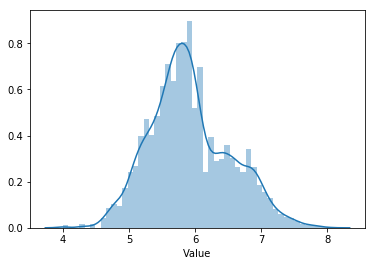

In [74]:
sns.distplot(part1['Value'],bins=50)

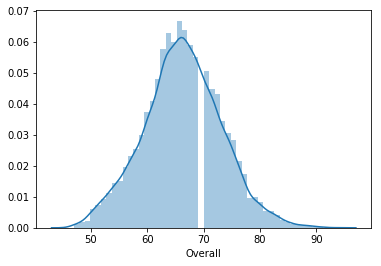

In [75]:
sns.distplot(part1['Overall'],bins=50)

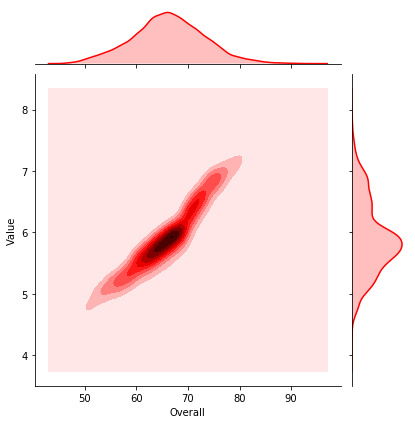

In [76]:
sns.jointplot('Overall','Value',part1,kind='kde',color='r')

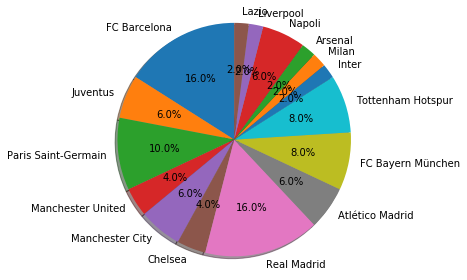

In [79]:
top_50 = datafile.sort_values(by='Overall',ascending=False).head(50)
club_50 = hist(list(top_50['Club']))
keys = club_50.keys()
club = []
club_co = []
for key in keys:
    club.append(key)
    club_co.append(club_50[key])
    
labels = club
sizes = club_co
colors = None
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,shadow=True)
ax1.axis('equal')
plt.tight_layout()
plt.show()